In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Stationarity - USILaughs

In [2]:
left_pp = [0.24, 0.048, 0.77, 0.6, 0.58, 0.57, 0.39, 0.0031, 0.027, 0.68, 0.14, 0.89, 0.52, 1, 0.99, 0.56, 0.76, 1, 1, 0.006, 0.9, 1,0.99, 0.13, 0.0011, 0.89, 1, 0.65, 0.83, 0.99, 0.56, 0.052]
right_pp = [0.26, 0.12, 0.84, 0.95, 0.58, 0.65, 0.95, 0.98, 0.0023, 0.92, 0.55, 0.97, 0.41, 0.81, 0.14, 0.58, 0.078, 0.0036, 0.81, 0.86, 0.58, 1, 0.88, 0.42, 0.0012, 0.069, 1, 1, 0.22, 1, 0.24, 0.15]

left_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 0.96, 1, 1]
right_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

left_dfgls = [0.14, 1, 0.53, 0.072, 0.99, 0.87, 0.98, 0.77, 0.74, 0.65, 1, 0.55, 0.14, 0.95, 0.23, 0.36, 0.095, 0.87, 0.014, 1, 0.27, 0.96, 0.066, 1, 0.96, 1, 0.036, 0.87, 0.52, 0.0014, 0.71, 0.95]
right_dfgls =[0.17, 1, 0.58, 0.21, 0.99, 1, 0.85, 0.22, 1, 0.86, 0.77, 0.2, 0.37, 0.74, 0.94, 0.44, 0.4, 0.99, 1, 0.61, 0.31, 0.84, 0.076, 1, 0.99, 1, 0.57, 0.0009, 0.76, 0.82, 0.44, 0.98]

left_adf = [0.45, 0.0068, 0.73, 0.71, 0.67, 0.42, 0.28, 0.001, 0.084, 0.77, 0.27, 0.76, 0.8, 1, 0.91, 0.51, 0.81, 1,1, 0.0099, 0.79, 1, 0.98, 0.24, 0.0012, 1, 0.99, 0.63, 0.54, 0.98, 0.36, 0.066]
right_adf = [0.41, 0.12, 0.76, 0.93, 0.63, 0.94, 0.89, 0.76, 0.0026, 0.51, 0.42, 0.88, 0.44, 0.73, 0.022, 0.89, 0.13, 0.004, 0.96, 0.84, 0.44, 1, 0.79, 0.48, 0.00093, 0.011, 0.97, 1, 0.047, 1, 0.14, 0.19]

In [3]:
# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([left_pp, right_pp, left_kpss, right_kpss, left_dfgls, right_dfgls, left_adf, right_adf]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = pd.MultiIndex.from_tuples([('left', 'pp'), ('right', 'pp'), ('left', 'kpss'), ('right', 'kpss'), ('left', 'dfgls'), ('right', 'dfgls'), ('left', 'adf'), ('right', 'adf')])
# sort by the first level of the multi index
df = df.sort_index(axis=1, level=0)

In [4]:
# make a separate dataframe for each test type
pp = df.xs('pp', axis=1, level=1)
kpss = df.xs('kpss', axis=1, level=1)
dfgls = df.xs('dfgls', axis=1, level=1)
adf = df.xs('adf', axis=1, level=1)

dataframes: dict[str, pd.DataFrame] = {'Philip-Perron': pp, 'KPSS': kpss, 'DFGLS': dfgls, 'ADF': adf}

ValueError: Per-column arrays must each be 1-dimensional

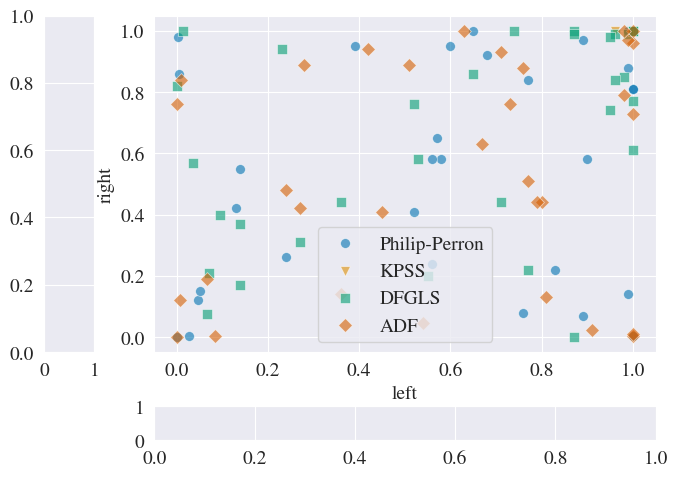

In [5]:
values1 = df["left"].values
values2 = df["right"].values

# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "v", "s", "D"]

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=4)

fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 5),
    gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
)
plt.tight_layout()

for marker, col, (test_name, df) in zip(markers, palette, dataframes.items()):
    sns.scatterplot(
        data=df,
        x="left",
        y="right",
        label=test_name,
        marker=marker,
        s=50,
        alpha=0.6,
        color=col,
        ax=axs[0, 1]
    )

axs[1, 0].axis("off")

sns.kdeplot(
    x=values1,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[1, 1],
)
sns.rugplot(
    x=values1,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel("P-value, left side EDA signal")
axs[0, 1].set_xlim(-0.25, 1.05)
axs[1, 1].set_xlim(-0.25, 1.05)
axs[0, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
axs[0, 1].set_yticklabels([])
axs[0, 1].set_ylabel(None)
axs[1, 1].set_ylabel(None)

axs[0, 0].invert_xaxis()
axs[1, 1].invert_yaxis()
sns.kdeplot(
    y=values2,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[0, 0],
)
sns.rugplot(
    y=values2,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[0, 0],
)
axs[0, 0].set_ylabel("P-value, right side EDA signal")
axs[0, 1].set_ylim(-0.25, 1.05)
axs[0, 0].set_ylim(-0.25, 1.05)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_xticklabels([])


axs[0, 1].grid(False)
axs[0, 1].set_title("P-values for stationarity tests")
plt.subplots_adjust(wspace=0.04, hspace=0.04)

for ax in axs:
    for ax2 in ax:
        ax2.set_anchor("W")
# plt.savefig("visualizations/test.pdf")
axs[0,1].grid(True)
# draw one vertical lines at 0.05
axs[0,1].axvline(0.05, color="black", linestyle="--")
# draw one horizontal line at 0.05
axs[0,1].axhline(0.05, color="black", linestyle="--")

# leg.get_title().set_text('Stationarity test')
# draw a rectangle around the points that are significant for both sides
axs[0,1].add_patch(
    patches.Rectangle(
        (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
    ),
)
axs[0,1].legend(loc="upper right", bbox_to_anchor=(1.2, 0.6), title="Stationarity test")
plt.savefig("../final_visualizations/stationarity_tests-usilaughs.pdf", bbox_inches="tight")
plt.show()


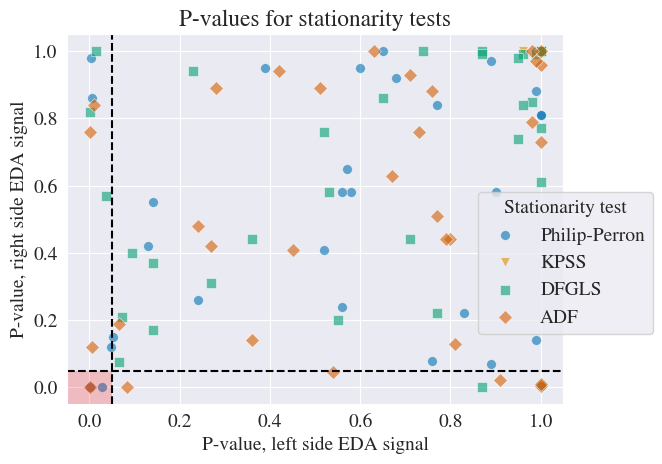

In [12]:
# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "v", "s", "D"]

# set golden ratio figure size
plt.figure(figsize=(6.4, 4.8))

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=4)

# make the scatterplot
for marker, col, (test_name, df) in zip(markers, palette, dataframes.items()):
    sns.scatterplot(
        data=df,
        x="left",
        y="right",
        label=test_name,
        marker=marker,
        s=50,
        alpha=0.6,
        color=col,
    )
plt.xlabel("P-value, left side EDA signal")
plt.ylabel("P-value, right side EDA signal")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.6), title="Stationarity test")
plt.title("P-values for stationarity tests")
# draw one vertical lines at 0.05
plt.axvline(0.05, color="black", linestyle="--")
# draw one horizontal line at 0.05
plt.axhline(0.05, color="black", linestyle="--")

# leg.get_title().set_text('Stationarity test')
# draw a rectangle around the points that are significant for both sides
plt.gca().add_patch(
    patches.Rectangle(
        (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
    )
)
plt.savefig("../final_visualizations/stationarity_tests-usilaughs.pdf", bbox_inches="tight")
plt.show()


# Stationarity MWC2022

In [6]:
pp = pd.read_csv("../test_results/PhillipsPerron_pvalues_mwc2022.csv", index_col=0, header=[0,1]).T.reset_index(drop=True)

kpss = pd.read_csv("../test_results/KPSS_pvalues_mwc2022.csv", index_col=0, header=[0,1]).T.reset_index(drop=True)

dfgls = pd.read_csv("../test_results/DFGLS_pvalues_mwc2022.csv", index_col=0, header=[0,1]).T.reset_index(drop=True)

adf = pd.read_csv("../test_results/ADF_pvalues_mwc2022.csv", index_col=0, header=[0,1]).T.reset_index(drop=True)
# left_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 0.96, 1, 1]
# right_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# left_dfgls = [0.14, 1, 0.53, 0.072, 0.99, 0.87, 0.98, 0.77, 0.74, 0.65, 1, 0.55, 0.14, 0.95, 0.23, 0.36, 0.095, 0.87, 0.014, 1, 0.27, 0.96, 0.066, 1, 0.96, 1, 0.036, 0.87, 0.52, 0.0014, 0.71, 0.95]
# right_dfgls =[0.17, 1, 0.58, 0.21, 0.99, 1, 0.85, 0.22, 1, 0.86, 0.77, 0.2, 0.37, 0.74, 0.94, 0.44, 0.4, 0.99, 1, 0.61, 0.31, 0.84, 0.076, 1, 0.99, 1, 0.57, 0.0009, 0.76, 0.82, 0.44, 0.98]

# left_adf = [0.45, 0.0068, 0.73, 0.71, 0.67, 0.42, 0.28, 0.001, 0.084, 0.77, 0.27, 0.76, 0.8, 1, 0.91, 0.51, 0.81, 1,1, 0.0099, 0.79, 1, 0.98, 0.24, 0.0012, 1, 0.99, 0.63, 0.54, 0.98, 0.36, 0.066]
# right_adf = [0.41, 0.12, 0.76, 0.93, 0.63, 0.94, 0.89, 0.76, 0.0026, 0.51, 0.42, 0.88, 0.44, 0.73, 0.022, 0.89, 0.13, 0.004, 0.96, 0.84, 0.44, 1, 0.79, 0.48, 0.00093, 0.011, 0.97, 1, 0.047, 1, 0.14, 0.19]

In [7]:
dataframes: dict[str, pd.DataFrame] = {'Philip-Perron': pp, 'KPSS': kpss, 'DFGLS': dfgls, 'ADF': adf}

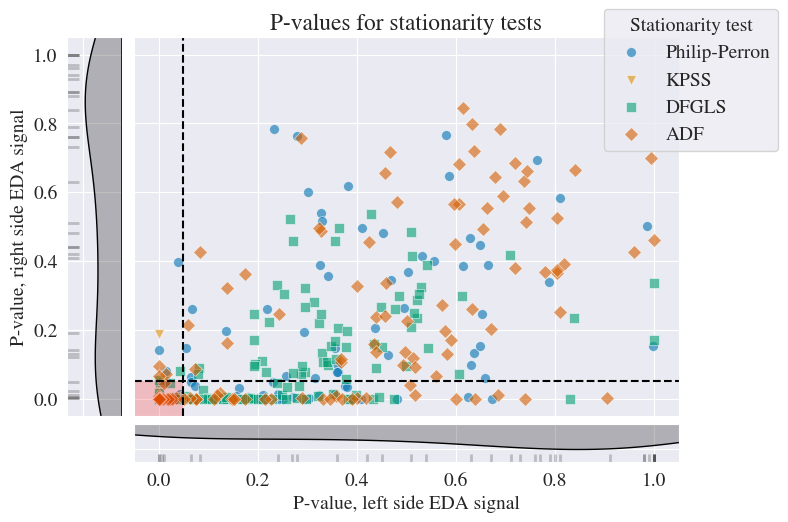

In [8]:
values1 = df["left"].values
values2 = df["right"].values

# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "v", "s", "D"]

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=4)

fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 5),
    gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
)
plt.tight_layout()

for marker, col, (test_name, df) in zip(markers, palette, dataframes.items()):
    sns.scatterplot(
        data=df,
        x="left",
        y="right",
        label=test_name,
        marker=marker,
        s=50,
        alpha=0.6,
        color=col,
        ax=axs[0, 1]
    )

axs[1, 0].axis("off")

sns.kdeplot(
    x=values1,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[1, 1],
)
sns.rugplot(
    x=values1,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel("P-value, left side EDA signal")
axs[0, 1].set_xlim(-0.25, 1.05)
axs[1, 1].set_xlim(-0.25, 1.05)
axs[0, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
axs[0, 1].set_yticklabels([])
axs[0, 1].set_ylabel(None)
axs[1, 1].set_ylabel(None)

axs[0, 0].invert_xaxis()
axs[1, 1].invert_yaxis()
sns.kdeplot(
    y=values2,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[0, 0],
)
sns.rugplot(
    y=values2,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[0, 0],
)
axs[0, 0].set_ylabel("P-value, right side EDA signal")
axs[0, 1].set_ylim(-0.25, 1.05)
axs[0, 0].set_ylim(-0.25, 1.05)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_xticklabels([])


axs[0, 1].grid(False)
axs[0, 1].set_title("P-values for stationarity tests")
plt.subplots_adjust(wspace=0.04, hspace=0.04)

for ax in axs:
    for ax2 in ax:
        ax2.set_anchor("W")
# plt.savefig("visualizations/test.pdf")
axs[0,1].grid(True)
# draw one vertical lines at 0.05
axs[0,1].axvline(0.05, color="black", linestyle="--")
# draw one horizontal line at 0.05
axs[0,1].axhline(0.05, color="black", linestyle="--")

# leg.get_title().set_text('Stationarity test')
# draw a rectangle around the points that are significant for both sides
axs[0,1].add_patch(
    patches.Rectangle(
        (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
    ),
)
axs[0,1].legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), title="Stationarity test")
plt.savefig("../final_visualizations/stationarity_tests-mwc2022.pdf", bbox_inches="tight")
plt.show()


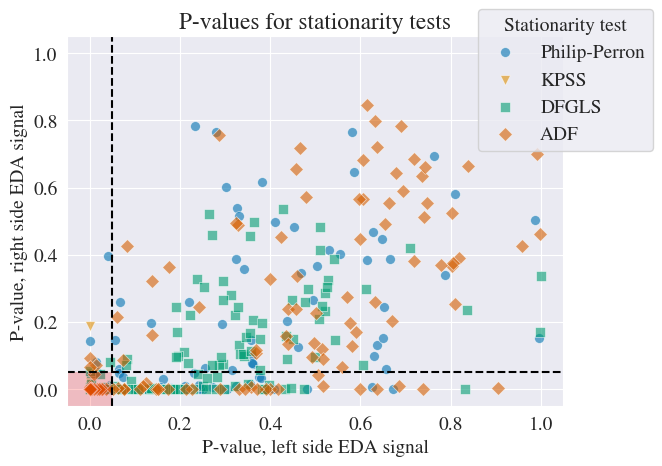

In [33]:
# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "v", "s", "D"]

# set golden ratio figure size
plt.figure(figsize=(6.4, 4.8))

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=4)

# make the scatterplot
for marker, col, (test_name, df) in zip(markers, palette, dataframes.items()):
    sns.scatterplot(
        data=df,
        x="left",
        y="right",
        label=test_name,
        marker=marker,
        s=50,
        alpha=0.6,
        color=col,
    )
plt.xlabel("P-value, left side EDA signal")
plt.ylabel("P-value, right side EDA signal")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), title="Stationarity test")
plt.title("P-values for stationarity tests")
# draw one vertical lines at 0.05
plt.axvline(0.05, color="black", linestyle="--")
# draw one horizontal line at 0.05
plt.axhline(0.05, color="black", linestyle="--")

plt.ylim(-0.25,1.05)
plt.xlim(-0.25,1.05)

# leg.get_title().set_text('Stationarity test')
# draw a rectangle around the points that are significant for both sides
plt.gca().add_patch(
    patches.Rectangle(
        (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
    )
)
plt.savefig("../final_visualizations/stationarity_tests-mwc2022.pdf", bbox_inches="tight")
plt.show()


# DCCA - USILaughs

In [2]:
baseline = [0.31, 0.13, 0.77, 0.074, 0.43, 0.92, 0.23, 0.2, 0.23, 0.12, 0.076, 0.088, 0.15, 0.1, 2.9e-06, 0.042, 0.086, 0.065, 0.25, 0.0022, 0.62, 0.27, 0.7, 0.045, 0.17, 0.059, 0.43, 0.017, 0.25, 0.55, 0.043, 0.0019]
cognitive_load = [0.0044, 0.75, 0.94, 0.0099, 0.0011, 0.93, 0.16, 0.049, 0.24, 0.0016, 0.14, 0.021, 0.065, 0.38, 0.66, 0.11, -0.0011, 0.28, 0.82, 0.59, 0.87, 0.018, 0.17, 0.21, 0.016, 0.017, 0.53,0.47, 0.21, 0.18, 0.1, 0.41]

In [3]:
# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([baseline, cognitive_load]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = ['Relaxation', 'Cognitive Load']
# sort by the first level of the multi index
# df = df.sort_index(axis=1)

In [4]:
df['Participant ID']= [
"s052","s043","s037","s038","s072","s075","s066","s053","s077","s045","s047","s074","s044","s048","s055","s098","s083","s089","s087","s099","s039","s042","s097","s081","s088","s073","s096","s065","s071","s059","s092","s049"
]

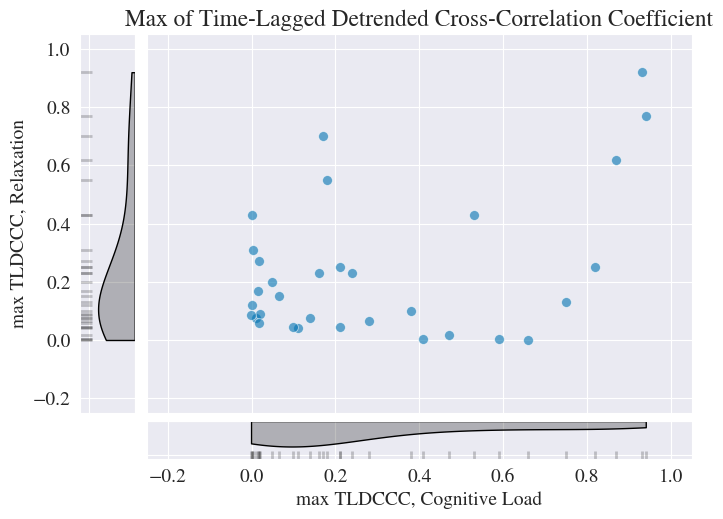

In [6]:
values1 = df["Cognitive Load"].values
values2 = df["Relaxation"].values

# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "+"]

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=len(df))

fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 5),
    gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
)
plt.tight_layout()

sns.scatterplot(
    data=df,
    x="Cognitive Load",
    y="Relaxation",
    label="",
    marker=markers[0],
    s=50,
    alpha=0.6,
    color=palette[0],
    ax=axs[0, 1],
)

axs[1, 0].axis("off")

sns.kdeplot(
    x=values1,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[1, 1],
    cut=0,
)
sns.rugplot(
    x=values1,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel("max TLDCCC, Cognitive Load")
axs[0, 1].set_xlim(-0.25, 1.05)
axs[1, 1].set_xlim(-0.25, 1.05)
axs[0, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
axs[0, 1].set_yticklabels([])
axs[0, 1].set_ylabel(None)
axs[1, 1].set_ylabel(None)

axs[0, 0].invert_xaxis()
axs[1, 1].invert_yaxis()
sns.kdeplot(
    y=values2,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[0, 0],
    cut=0,
)
sns.rugplot(
    y=values2,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[0, 0],
)
axs[0, 0].set_ylabel("max TLDCCC, Relaxation")
axs[0, 1].set_ylim(-0.25, 1.05)
axs[0, 0].set_ylim(-0.25, 1.05)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_xticklabels([])


axs[0, 1].grid(False)
axs[0, 1].set_title("Max of Time-Lagged Detrended Cross-Correlation Coefficient")
plt.subplots_adjust(wspace=0.04, hspace=0.04)

for ax in axs:
    for ax2 in ax:
        ax2.set_anchor("W")
# plt.savefig("visualizations/test.pdf")
axs[0,1].grid(True)
# # draw one vertical lines at 0.05
# axs[0,1].axvline(0.05, color="black", linestyle="--")
# # draw one horizontal line at 0.05
# axs[0,1].axhline(0.05, color="black", linestyle="--")

# # leg.get_title().set_text('Stationarity test')
# # draw a rectangle around the points that are significant for both sides
# axs[0,1].add_patch(
#     patches.Rectangle(
#         (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
#     ),
# )
plt.savefig("../final_visualizations/dcca-usilaughs.pdf", bbox_inches="tight")
plt.show()


In [7]:
df_violin_usilaughs = df.iloc[:,:2].unstack().reset_index()
df_violin_usilaughs.columns = ['Event type', 'index', 'TLDCCC']
df_violin_usilaughs = df_violin_usilaughs.drop('index', axis=1, inplace=False)
df_violin_usilaughs['Dataset'] = 'USILaughs'
df_violin_usilaughs['all'] = ""

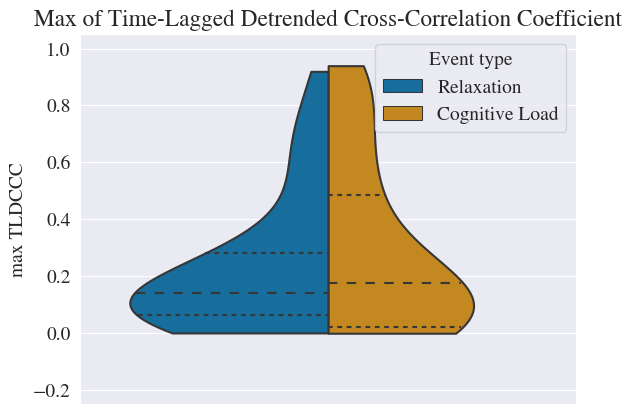

In [8]:
# make violinplot with the values, where values1 is one half and values 2 in the other half
# set golden ratio figure size
plt.figure(figsize=(6.4, 4.8))

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=2)

# make the violinplot

sns.violinplot(
    data=df_violin_usilaughs,
    y="TLDCCC",
    x="all",
    hue='Event type',
    # label="",
    palette=palette,
    # ax=axs[0, 1],
    split=True,
    inner="quartile",
    gap=.1,
    cut=0,
)

plt.xlabel("")
plt.ylabel("max TLDCCC")
plt.title("Max of Time-Lagged Detrended Cross-Correlation Coefficient")
plt.ylim(-0.25,1.05)
# plt.xlim(-0.25,1.05)
plt.savefig("../final_visualizations/violin-dcca-usilaughs.pdf", bbox_inches="tight")

# DCCA - MWC2022

In [9]:
# load pickled dict
#
from pickle import load

with open("../test_results/max_dcca_w_events_mwc2022.pkl", "rb") as f:
    dcca: dict[str, dict[str, dict[str, float]]] = load(f)

In [10]:
sleep = [
    sleep_data
    for user_data in dcca.values()
    for session_data in user_data.values()
    for event_name, sleep_data in session_data.items() if event_name == "sleep"
]

wake1 = [
    wake1_data
    for user_data in dcca.values()
    for session_data in user_data.values()
    for event_name, wake1_data in session_data.items() if event_name == "wake1"
] 

wake2 = [
    wake2_data
    for user_data in dcca.values()
    for session_data in user_data.values()
    for event_name, wake2_data in session_data.items() if event_name == "wake2"
]

In [11]:
# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([sleep, wake1]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = ['Sleep', 'Awake']
# sort by the first level of the multi index
# df = df.sort_index(axis=1)

In [12]:
df_violin_mwc2022 = df.iloc[:,:2].unstack().reset_index()
df_violin_mwc2022.columns = ['Event type', 'index', 'TLDCCC']
df_violin_mwc2022 = df_violin_mwc2022.drop('index', axis=1, inplace=False)
df_violin_mwc2022['Dataset'] = 'BiHeartS'

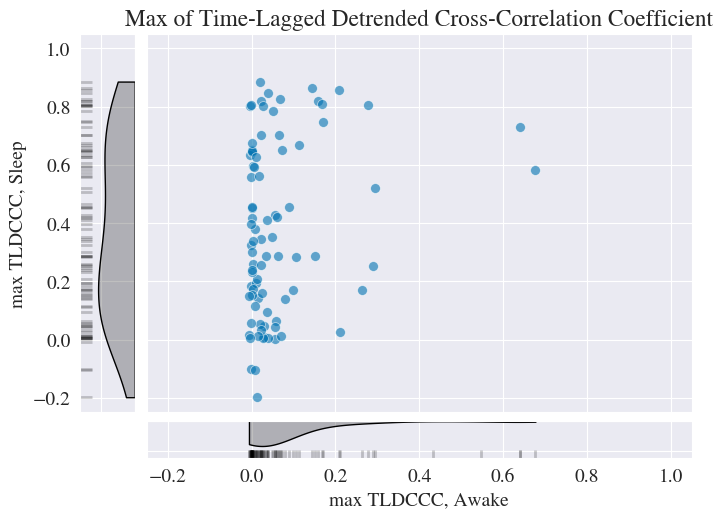

In [13]:
values1 = df["Awake"].values
values2 = df["Sleep"].values

# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "+"]

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=len(df))

fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 5),
    gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
)
plt.tight_layout()

sns.scatterplot(
    data=df,
    x="Awake",
    y="Sleep",
    label="",
    marker=markers[0],
    s=50,
    alpha=0.6,
    color=palette[0],
    ax=axs[0, 1],
)

axs[1, 0].axis("off")

sns.kdeplot(
    x=values1,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[1, 1],
    cut=0,
)
sns.rugplot(
    x=values1,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel("max TLDCCC, Awake")
axs[0, 1].set_xlim(-0.25, 1.05)
axs[1, 1].set_xlim(-0.25, 1.05)
axs[0, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
axs[0, 1].set_yticklabels([])
axs[0, 1].set_ylabel(None)
axs[1, 1].set_ylabel(None)

axs[0, 0].invert_xaxis()
axs[1, 1].invert_yaxis()
sns.kdeplot(
    y=values2,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[0, 0],
    cut=0,
)
sns.rugplot(
    y=values2,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[0, 0],
)
axs[0, 0].set_ylabel("max TLDCCC, Sleep")
axs[0, 1].set_ylim(-0.25, 1.05)
axs[0, 0].set_ylim(-0.25, 1.05)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_xticklabels([])


axs[0, 1].grid(False)
axs[0, 1].set_title("Max of Time-Lagged Detrended Cross-Correlation Coefficient")
plt.subplots_adjust(wspace=0.04, hspace=0.04)

for ax in axs:
    for ax2 in ax:
        ax2.set_anchor("W")
# plt.savefig("visualizations/test.pdf")
axs[0,1].grid(True)
# # draw one vertical lines at 0.05
# axs[0,1].axvline(0.05, color="black", linestyle="--")
# # draw one horizontal line at 0.05
# axs[0,1].axhline(0.05, color="black", linestyle="--")

# # leg.get_title().set_text('Stationarity test')
# # draw a rectangle around the points that are significant for both sides
# axs[0,1].add_patch(
#     patches.Rectangle(
#         (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
#     ),
# )
plt.savefig("../final_visualizations/dcca-mwc2022-sleepwake1.pdf", bbox_inches="tight")
plt.show()


In [14]:
# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([sleep, wake2]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = ['Sleep', 'Awake']
# sort by the first level of the multi index
# df = df.sort_index(axis=1)

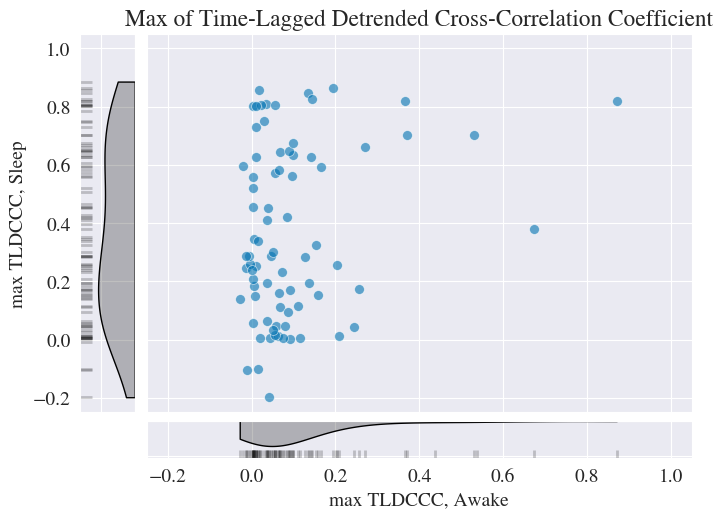

In [15]:
values1 = df["Awake"].values
values2 = df["Sleep"].values

# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "+"]

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=len(df))

fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 5),
    gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
)
plt.tight_layout()

sns.scatterplot(
    data=df,
    x="Awake",
    y="Sleep",
    label="",
    marker=markers[0],
    s=50,
    alpha=0.6,
    color=palette[0],
    ax=axs[0, 1],
)

axs[1, 0].axis("off")

sns.kdeplot(
    x=values1,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[1, 1],
    cut=0,
)
sns.rugplot(
    x=values1,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel("max TLDCCC, Awake")
axs[0, 1].set_xlim(-0.25, 1.05)
axs[1, 1].set_xlim(-0.25, 1.05)
axs[0, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
axs[0, 1].set_yticklabels([])
axs[0, 1].set_ylabel(None)
axs[1, 1].set_ylabel(None)

axs[0, 0].invert_xaxis()
axs[1, 1].invert_yaxis()
sns.kdeplot(
    y=values2,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[0, 0],
    cut=0,
)
sns.rugplot(
    y=values2,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[0, 0],
)
axs[0, 0].set_ylabel("max TLDCCC, Sleep")
axs[0, 1].set_ylim(-0.25, 1.05)
axs[0, 0].set_ylim(-0.25, 1.05)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_xticklabels([])


axs[0, 1].grid(False)
axs[0, 1].set_title("Max of Time-Lagged Detrended Cross-Correlation Coefficient")
plt.subplots_adjust(wspace=0.04, hspace=0.04)

for ax in axs:
    for ax2 in ax:
        ax2.set_anchor("W")
# plt.savefig("visualizations/test.pdf")
axs[0,1].grid(True)
# # draw one vertical lines at 0.05
# axs[0,1].axvline(0.05, color="black", linestyle="--")
# # draw one horizontal line at 0.05
# axs[0,1].axhline(0.05, color="black", linestyle="--")

# # leg.get_title().set_text('Stationarity test')
# # draw a rectangle around the points that are significant for both sides
# axs[0,1].add_patch(
#     patches.Rectangle(
#         (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
#     ),
# )
plt.savefig("../final_visualizations/dcca-mwc2022-sleepwake2.pdf", bbox_inches="tight")
plt.show()


In [16]:
# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([sleep, wake1, wake2]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = ['Sleep', 'Wake1', 'Wake2']
df['Awake'] = df['Wake1'] + df['Wake2'] / 2
# sort by the first level of the multi index
# df = df.sort_index(axis=1)

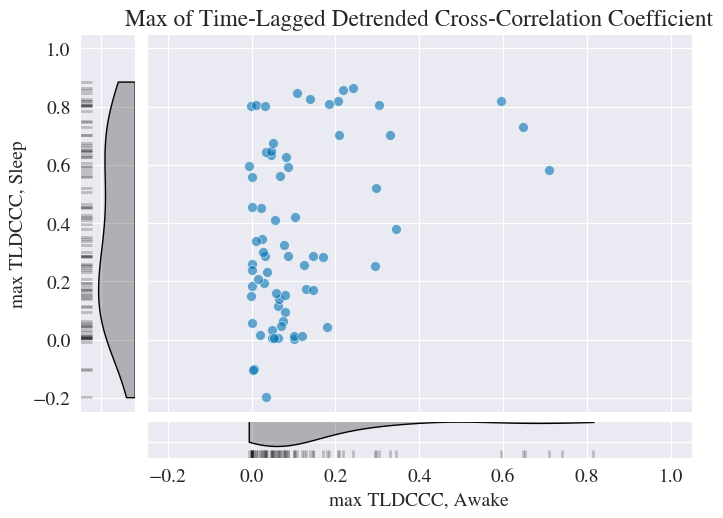

In [17]:
values1 = df["Awake"].values
values2 = df["Sleep"].values

# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "+"]

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=len(df))

fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 5),
    gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
)
plt.tight_layout()

sns.scatterplot(
    data=df,
    x="Awake",
    y="Sleep",
    label="",
    marker=markers[0],
    s=50,
    alpha=0.6,
    color=palette[0],
    ax=axs[0, 1],
)

axs[1, 0].axis("off")

sns.kdeplot(
    x=values1,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[1, 1],
    cut=0,
)
sns.rugplot(
    x=values1,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel("max TLDCCC, Awake")
axs[0, 1].set_xlim(-0.25, 1.05)
axs[1, 1].set_xlim(-0.25, 1.05)
axs[0, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
axs[0, 1].set_yticklabels([])
axs[0, 1].set_ylabel(None)
axs[1, 1].set_ylabel(None)

axs[0, 0].invert_xaxis()
axs[1, 1].invert_yaxis()
sns.kdeplot(
    y=values2,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[0, 0],
    cut=0,
)
sns.rugplot(
    y=values2,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[0, 0],
)
axs[0, 0].set_ylabel("max TLDCCC, Sleep")
axs[0, 1].set_ylim(-0.25, 1.05)
axs[0, 0].set_ylim(-0.25, 1.05)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_xticklabels([])


axs[0, 1].grid(False)
axs[0, 1].set_title("Max of Time-Lagged Detrended Cross-Correlation Coefficient")
plt.subplots_adjust(wspace=0.04, hspace=0.04)

for ax in axs:
    for ax2 in ax:
        ax2.set_anchor("W")
# plt.savefig("visualizations/test.pdf")
axs[0,1].grid(True)
# # draw one vertical lines at 0.05
# axs[0,1].axvline(0.05, color="black", linestyle="--")
# # draw one horizontal line at 0.05
# axs[0,1].axhline(0.05, color="black", linestyle="--")

# # leg.get_title().set_text('Stationarity test')
# # draw a rectangle around the points that are significant for both sides
# axs[0,1].add_patch(
#     patches.Rectangle(
#         (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
#     ),
# )
plt.savefig("../final_visualizations/dcca-mwc2022-sleepwake.pdf", bbox_inches="tight")
plt.show()


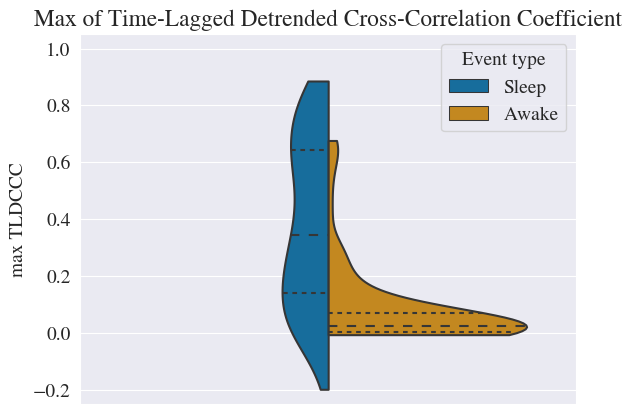

In [18]:
df_violin_mwc2022['all'] = ""
# make violinplot with the values, where values1 is one half and values 2 in the other half
# set golden ratio figure size
plt.figure(figsize=(6.4, 4.8))

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=2)

# make the violinplot

sns.violinplot(
    data=df_violin_mwc2022,
    y="TLDCCC",
    x="all",
    hue='Event type',
    # label="",
    palette=palette,
    # ax=axs[0, 1],
    split=True,
    inner="quartile",
    gap=.1,
    cut=0,
)

plt.xlabel("")
plt.ylabel("max TLDCCC")
plt.title("Max of Time-Lagged Detrended Cross-Correlation Coefficient")
plt.ylim(-0.25,1.05)
# plt.xlim(-0.25,1.05)
plt.savefig("../final_visualizations/violin-dcca-mwc2022.pdf", bbox_inches="tight")

Nel discorso, dire che la correlazione è bassa in tutti i casi, anche se Awake è più alta. In ogni caso, è difficile capire se la correlazione sia effettivamente dovuta ai segnali che contengono diverse informazioni, oppure a differenze di posizione, dispositivi e altre. 

# DTW - USILaughs

In [23]:
df = pd.read_csv("../test_results/dtw-usilaughs.csv", index_col=0)

In [24]:
# move the 1 column into two separate columns, called "Cognitive Load" and "Relaxation"
df = df.pivot(index="0", columns="1", values="2")
df.columns = ["Relaxation", "Cognitive Load"]

In [25]:
small_fontsize=18
medium_fontsize=23
large_fontsize=25

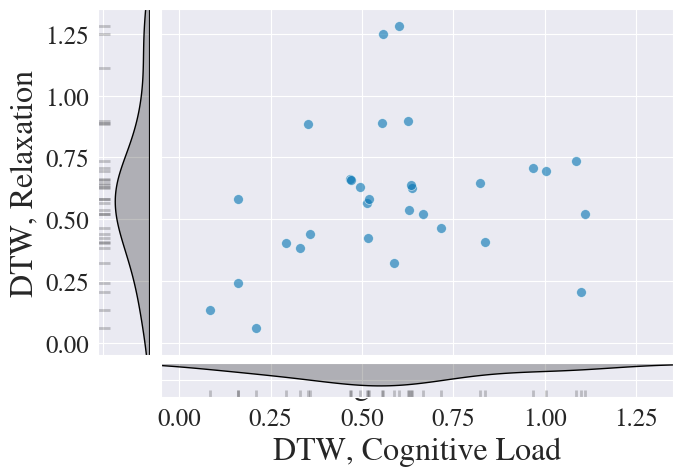

In [26]:
values1 = df["Cognitive Load"].values
values2 = df["Relaxation"].values

# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "+"]

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rc('font', size=small_fontsize)          # controls default text sizes
plt.rc('axes', titlesize=medium_fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=large_fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=medium_fontsize)    # legend fontsize
plt.rc('figure', titlesize=large_fontsize)  # fontsize of the figure title
plt.rcParams.update({"font.size": medium_fontsize})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=len(df))

fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 5),
    gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
)
plt.tight_layout()

sns.scatterplot(
    data=df,
    x="Cognitive Load",
    y="Relaxation",
    label="",
    marker=markers[0],
    s=50,
    alpha=0.6,
    color=palette[0],
    ax=axs[0, 1],
)

axs[1, 0].axis("off")

sns.kdeplot(
    x=values1,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[1, 1],
)
sns.rugplot(
    x=values1,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel("DTW, Cognitive Load")
axs[0, 1].set_xlim(-0.25, 1.35)
axs[1, 1].set_xlim(-0.25, 1.35)
axs[0, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
axs[0, 1].set_yticklabels([])
axs[0, 1].set_ylabel(None)
axs[1, 1].set_ylabel(None)

axs[0, 0].invert_xaxis()
axs[1, 1].invert_yaxis()
sns.kdeplot(
    y=values2,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[0, 0],
)
sns.rugplot(
    y=values2,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[0, 0],
)
axs[0, 0].set_ylabel("DTW, Relaxation")
axs[0, 1].set_ylim(-0.25, 1.35)
axs[0, 0].set_ylim(-0.25, 1.35)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_xticklabels([])


axs[0, 1].grid(False)
# axs[0, 1].set_title("Average Dynamic Time Warping Distance")
plt.subplots_adjust(wspace=0.04, hspace=0.04)

for ax in axs:
    for ax2 in ax:
        ax2.set_anchor("W")
# plt.savefig("visualizations/test.pdf")
axs[0,1].grid(True)
# # draw one vertical lines at 0.05
# axs[0,1].axvline(0.05, color="black", linestyle="--")
# # draw one horizontal line at 0.05
# axs[0,1].axhline(0.05, color="black", linestyle="--")

# # leg.get_title().set_text('Stationarity test')
# # draw a rectangle around the points that are significant for both sides
# axs[0,1].add_patch(
#     patches.Rectangle(
#         (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
#     ),
# )
plt.savefig("../final_visualizations/dtw-usilaughs.pdf", bbox_inches="tight")
plt.show()


# DTW - MWC2022

In [27]:
df = pd.read_csv("../test_results/dtw-mwc2022.csv", index_col=0)

In [28]:
# move the 1 column into two separate columns, called "Cognitive Load" and "Relaxation"
df = df.pivot(index=["0", "1"], columns="2", values="3")
df.rename(columns={'sleep': 'Sleep', 'wake1': 'Wake1', 'wake2': 'Wake2'}, inplace=True)

In [29]:
df['Awake'] = df['Wake1'] + df['Wake2'] / 2

In [30]:
small_fontsize=18
medium_fontsize=23
large_fontsize=25

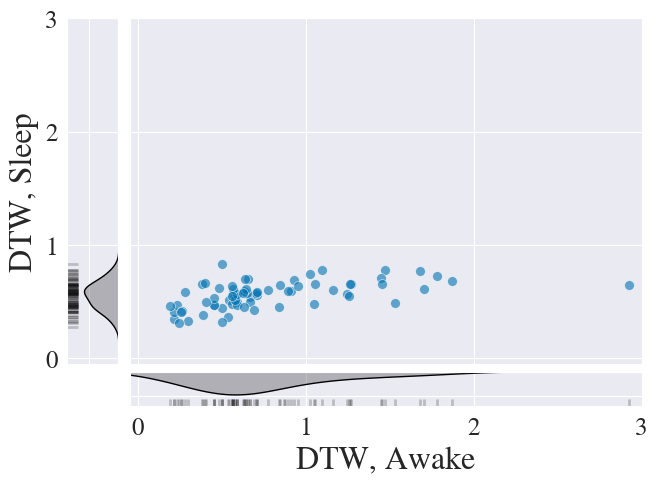

In [31]:
values1 = df["Awake"].values
values2 = df["Sleep"].values

# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "+"]

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rc('font', size=small_fontsize)          # controls default text sizes
plt.rc('axes', titlesize=medium_fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=large_fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=medium_fontsize)    # legend fontsize
plt.rc('figure', titlesize=large_fontsize)  # fontsize of the figure title
plt.rcParams.update({"font.size": medium_fontsize})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=len(df))

fig, axs = plt.subplots(
    2,
    2,
    figsize=(7, 5),
    gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
)
plt.tight_layout()

sns.scatterplot(
    data=df,
    x="Awake",
    y="Sleep",
    label="",
    marker=markers[0],
    s=50,
    alpha=0.6,
    color=palette[0],
    ax=axs[0, 1],
)

axs[1, 0].axis("off")

sns.kdeplot(
    x=values1,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[1, 1],
)
sns.rugplot(
    x=values1,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[1, 1],
)
axs[1, 1].set_xlabel("DTW, Awake")
axs[0, 1].set_xlim(-0.25, 3)
axs[1, 1].set_xlim(-0.25, 3)
axs[0, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
axs[0, 1].set_yticklabels([])
axs[0, 1].set_ylabel(None)
axs[1, 1].set_ylabel(None)

axs[0, 0].invert_xaxis()
axs[1, 1].invert_yaxis()
sns.kdeplot(
    y=values2,
    bw_method=0.5,
    color='black',
    fill=True,
    linewidth=1,
    ax=axs[0, 0],
)
sns.rugplot(
    y=values2,
    height=0.22,
    color="black",
    alpha=0.2,
    linewidth=2,
    ax=axs[0, 0],
)
axs[0, 0].set_ylabel("DTW, Sleep")
axs[0, 1].set_ylim(-0.25, 3)
axs[0, 0].set_ylim(-0.25, 3)
axs[0, 0].set_xlabel(None)
axs[0, 0].set_xticklabels([])


axs[0, 1].grid(False)
plt.subplots_adjust(wspace=0.04, hspace=0.04)

for ax in axs:
    for ax2 in ax:
        ax2.set_anchor("W")
# plt.savefig("visualizations/test.pdf")
axs[0,1].grid(True)
# # draw one vertical lines at 0.05
# axs[0,1].axvline(0.05, color="black", linestyle="--")
# # draw one horizontal line at 0.05
# axs[0,1].axhline(0.05, color="black", linestyle="--")

# # leg.get_title().set_text('Stationarity test')
# # draw a rectangle around the points that are significant for both sides
# axs[0,1].add_patch(
#     patches.Rectangle(
#         (-0.25, -0.25), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
#     ),
# )
plt.savefig("../final_visualizations/dtw-mwc2022.pdf", bbox_inches="tight")
plt.show()


# Cliff delta - methods

In [155]:
import ast


def make_errorplot(
    cliff_deltas: pd.DataFrame,
    type_event: str,
    color: tuple[float],
    custom_label: str | None = None,
    elinewidth: int = 30,
    markersize: int = 10,
) -> None:
    bounds = [
        ast.literal_eval(el)
        for el in cliff_deltas.loc[
            :, pd.IndexSlice[type_event, "confidence interval"]
        ].values
    ]
    values = (
        cliff_deltas.loc[:, pd.IndexSlice[type_event, "value"]].astype(float).values
    )
    lower_bounds = [abs(val - el[0]) for el, val in zip(bounds, values)]
    upper_bounds = [abs(el[1] - val) for el, val in zip(bounds, values)]
    
    if custom_label is None:
        custom_label = type_event

    plt.errorbar(
        x=cliff_deltas.index,
        y=values,
        yerr=(lower_bounds, upper_bounds),
        label=custom_label,
        elinewidth=elinewidth,
        linestyle="none",
        markersize=markersize,
        marker=".",
        color=color,
        ecolor=(*color, 0.3),
    )


# Cliff delta - USILaughs

In [165]:
import pandas as pd
cliff_deltas = pd.read_csv("../test_results/cliff_delta-usilaughs.csv", index_col=[0,1])
cliff_deltas = cliff_deltas.drop(columns=['peaks_amplitude_feat'], inplace=False)
cliff_deltas.columns = [col[:-5] for col in cliff_deltas.columns]
cliff_deltas = cliff_deltas.T

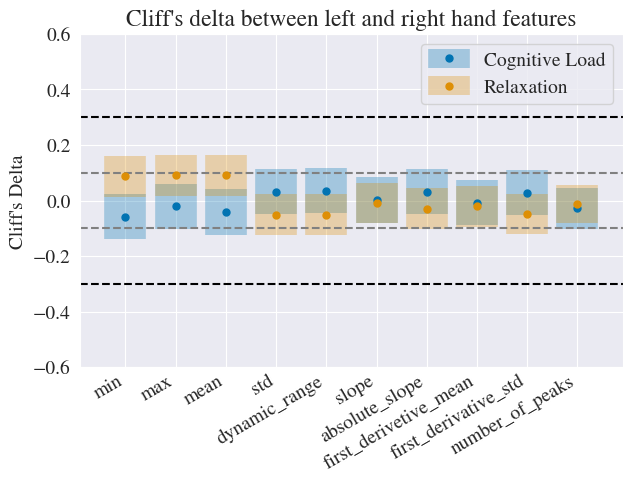

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the figure size using the golden ratio
golden_ratio = (5 ** 0.5 - 1) / 2
figsize = 7

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

fig, ax = plt.subplots(figsize=(figsize, figsize*golden_ratio))

colors = sns.color_palette("colorblind", n_colors=2)

make_errorplot(cliff_deltas, "Cognitive Load", colors[0])

make_errorplot(cliff_deltas, "Baseline", colors[1], "Relaxation")

plt.ylim(-0.6,0.6)
plt.margins(x=0.1)

# set a horizontal line at 0.1 and -0.1
plt.axhline(0.1, color="grey", linestyle="--")
plt.axhline(-0.1, color="grey", linestyle="--")

plt.axhline(0.3, color="black", linestyle="--")
plt.axhline(-0.3, color="black", linestyle="--")
plt.ylabel("Cliff's Delta")

# set the x label to a 30º angle
plt.xticks(rotation=30, ha="right")
# put the x label ticks closer
plt.tick_params(axis="x", which="major", pad=0.01)
# move the vertical grid lines to the right

plt.legend()
plt.title("Cliff's delta between left and right hand features")
plt.savefig("../final_visualizations/cliff_delta-usilaughs.pdf", bbox_inches="tight")
plt.show()

# Cliff delta - MWC2022

In [156]:
import pandas as pd

In [157]:
cliff_deltas = pd.read_csv("../test_results/cliff_delta-mwc2022.csv", index_col=[0,1])

In [158]:
cliff_deltas = cliff_deltas.drop(columns=['peaks_amplitude_feat'], inplace=False)

In [159]:
cliff_deltas.columns = [col[:-5] for col in cliff_deltas.columns]

In [160]:
cliff_deltas = cliff_deltas.T

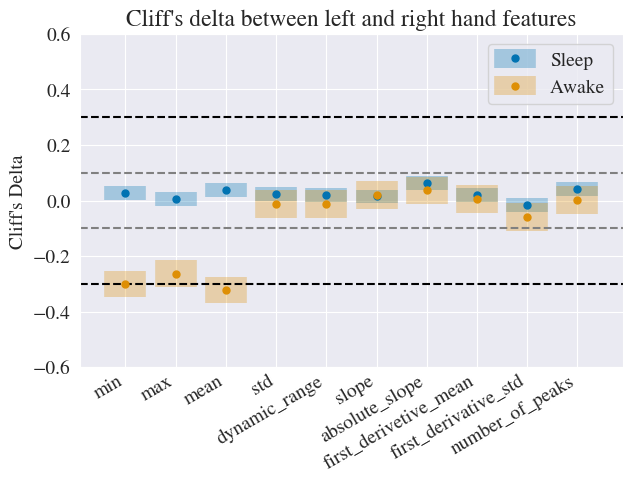

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the figure size using the golden ratio
golden_ratio = (5 ** 0.5 - 1) / 2
figsize = 7

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

fig, ax = plt.subplots(figsize=(figsize, figsize*golden_ratio))

colors = sns.color_palette("colorblind", n_colors=2)

make_errorplot(cliff_deltas, "Cognitive Load", colors[0], "Sleep")
make_errorplot(cliff_deltas, "Baseline", colors[1], "Awake")

plt.ylim(-0.6,0.6)
plt.margins(x=0.1)

# set a horizontal line at 0.1 and -0.1
plt.axhline(0.1, color="grey", linestyle="--")
plt.axhline(-0.1, color="grey", linestyle="--")

plt.axhline(0.3, color="black", linestyle="--")
plt.axhline(-0.3, color="black", linestyle="--")
plt.ylabel("Cliff's Delta")

# set the x label to a 30º angle
plt.xticks(rotation=30, ha="right")
# put the x label ticks closer
plt.tick_params(axis="x", which="major", pad=0.01)
# move the vertical grid lines to the right


plt.legend()
plt.title("Cliff's delta between left and right hand features")
plt.savefig("../final_visualizations/cliff_delta-mwc2022.pdf", bbox_inches="tight")
plt.show()